## `How to define the hand angles as added feature`

On our Model we have feature of the hand position and the proedictions are made from those features. It doesn't enable the model to understand fully some extended connexion between the features such as the angles between those. Therefore adding angles could have a significant impact on the model prediction and will attempt to add them in the modeling later. 

New info about the positional landmark for z : 

The x and y coordinates are normalized to [0.0, 1.0] by the image width and height, respectively. 

`The z coordinate represents the landmark depth, with the depth at the wrist being the origin. The smaller the value, the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.` 

cf Mediapipe : https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python

In [3]:
import pyarrow.parquet as pq
import pandas as pd

Let's take a look at the shape of the dataframe from last competition. (1 parquet file)

In [4]:
df = pd.read_parquet("d:/Bureau/ASLCapstone/1005492440.parquet")

In [5]:
df

,frame,row_id,type,landmark_index,x,y,z
0,72,72-face-0,face,0,0.464302,0.388650,-0.055482
1,72,72-face-1,face,1,0.477606,0.338725,-0.070924
2,72,72-face-2,face,2,0.474541,0.356419,-0.045901
3,72,72-face-3,face,3,0.469740,0.307372,-0.041824
4,72,72-face-4,face,4,0.479245,0.327108,-0.071651
...,...,...,...,...,...,...,...
41263,147,147-right_hand-16,right_hand,16,NaN,NaN,NaN
41264,147,147-right_hand-17,right_hand,17,NaN,NaN,NaN
41265,147,147-right_hand-18,right_hand,18,NaN,NaN,NaN
41266,147,147-right_hand-19,right_hand,19,NaN,NaN,NaN


https://github.com/ffs333/2nd_place_GISLR/blob/main/GISLR_utils/transformer_code/train_craft.py

In [8]:
df.shape

(41268, 7)

In [9]:
df.describe

<bound method NDFrame.describe of        frame             row_id        type  landmark_index         x  \
0         72          72-face-0        face               0  0.464302   
1         72          72-face-1        face               1  0.477606   
2         72          72-face-2        face               2  0.474541   
3         72          72-face-3        face               3  0.469740   
4         72          72-face-4        face               4  0.479245   
...      ...                ...         ...             ...       ...   
41263    147  147-right_hand-16  right_hand              16       NaN   
41264    147  147-right_hand-17  right_hand              17       NaN   
41265    147  147-right_hand-18  right_hand              18       NaN   
41266    147  147-right_hand-19  right_hand              19       NaN   
41267    147  147-right_hand-20  right_hand              20       NaN   

              y         z  
0      0.388650 -0.055482  
1      0.338725 -0.070924  
2    

We can group some of the landmark based on their positioning. 

In [12]:
HAND_ROUTES = [
    [0, *range(0, 4)], 
    [0, *range(4, 8)], 
    [0, *range(8, 12)], 
    [0, *range(12, 16)], 
    [0, *range(16, 20)],
]
# i did -1 to all of those criteria range to have a 0 base. 

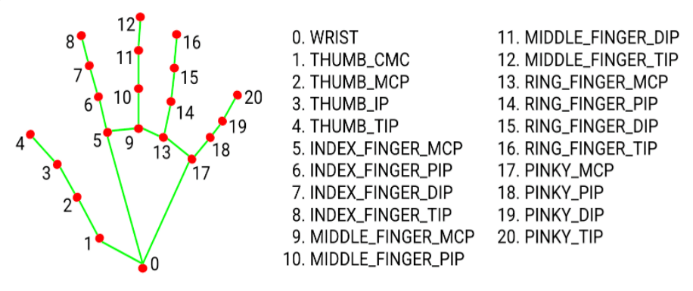

In [ ]:
HAND_ANGLES = np.array(sum([[route[i:i + 3] for i in range(len(route) - 2)] for route in HAND_ROUTES], [])),
HAND_EDGES = np.array(sum([[route[i:i + 2] for i in range(len(route) - 1)] for route in HAND_ROUTES], []))
HAND_TREES = sum([[np.array(route[i:]) for i in range(len(route) - 1)] for route in HAND_ROUTES], [])

rhand and lhand where defined as follow : 

In [ ]:
rhand = tf.concat([2 * lip[:,0:1,0:1] - rhand[...,0:1], rhand[...,1:]], -1)
lhand = tf.where(tfnp.sum(tfnp.isnan(lhand)) < tfnp.sum(tfnp.isnan(rhand)), lhand, rhand)

lhand = lhand if lhand.isnan().sum() < rhand.isnan().sum() else flip_hand(lip, rhand)

In [ ]:
lsim = F.cosine_similarity(lhand[:,HAND_ANGLES[:,0]] - lhand[:,HAND_ANGLES[:,1]],
                            lhand[:,HAND_ANGLES[:,2]] - lhand[:,HAND_ANGLES[:,1]], -1)

`F.cosine_similarity is a pytorch function, the equivalent function on tensorflow is : tf.keras.losses.cosine_similarity`

Let's see with our df: 

In [34]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np 

load a reduce df to test some angles first:

In [35]:
columns_of_interest = ['sequence_id',
'frame',
'x_right_hand_0', 'x_right_hand_1', 'x_right_hand_2', 'x_right_hand_3', 'x_right_hand_4', 'x_right_hand_5', 'x_right_hand_6', 'x_right_hand_7', 'x_right_hand_8', 'x_right_hand_9', 'x_right_hand_10', 'x_right_hand_11', 'x_right_hand_12',
'y_right_hand_0', 'y_right_hand_1', 'y_right_hand_2', 'y_right_hand_3', 'y_right_hand_4', 'y_right_hand_5', 'y_right_hand_6', 'y_right_hand_7', 'y_right_hand_8', 'y_right_hand_9', 'y_right_hand_10', 'y_right_hand_11', 'y_right_hand_12',
'z_right_hand_0', 'z_right_hand_1', 'z_right_hand_2', 'z_right_hand_3', 'z_right_hand_4', 'z_right_hand_5', 'z_right_hand_6', 'z_right_hand_7', 'z_right_hand_8', 'z_right_hand_9', 'z_right_hand_10', 'z_right_hand_11', 'z_right_hand_12',
'x_left_hand_0', 'x_left_hand_1', 'x_left_hand_2', 'x_left_hand_3', 'x_left_hand_4', 'x_left_hand_5', 'x_left_hand_6', 'x_left_hand_7', 'x_left_hand_8', 'x_left_hand_9', 'x_left_hand_10', 'x_left_hand_11', 'x_left_hand_12', 'x_left_hand_13',
'y_left_hand_0', 'y_left_hand_1', 'y_left_hand_2', 'y_left_hand_3', 'y_left_hand_4', 'y_left_hand_5', 'y_left_hand_6', 'y_left_hand_7', 'y_left_hand_8', 'y_left_hand_9', 'y_left_hand_10', 'y_left_hand_11', 'y_left_hand_12', 'y_left_hand_13',
'z_left_hand_0', 'z_left_hand_1', 'z_left_hand_2', 'z_left_hand_3', 'z_left_hand_4', 'z_left_hand_5', 'z_left_hand_6', 'z_left_hand_7', 'z_left_hand_8', 'z_left_hand_9', 'z_left_hand_10', 'z_left_hand_11', 'z_left_hand_12', 'z_left_hand_13']

df = pd.read_parquet('d:/Bureau/DS/aCapstone/527708222.parquet', columns=columns_of_interest)
df

,frame,x_right_hand_0,x_right_hand_1,x_right_hand_2,x_right_hand_3,x_right_hand_4,x_right_hand_5,x_right_hand_6,x_right_hand_7,x_right_hand_8,...,z_left_hand_4,z_left_hand_5,z_left_hand_6,z_left_hand_7,z_left_hand_8,z_left_hand_9,z_left_hand_10,z_left_hand_11,z_left_hand_12,z_left_hand_13
sequence_id,,,,,,,,,,,,,,,,,,,,,
1880607618,0,0.200624,0.302635,0.427209,0.531130,0.609704,0.466830,0.621508,0.720132,0.782646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880607618,1,0.240830,0.374630,0.474594,0.547350,0.596090,0.453041,0.591468,0.683067,0.740463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880607618,2,0.235014,0.375686,0.485869,0.566487,0.630853,0.434785,0.536943,0.621403,0.682213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880607618,3,0.252615,0.385305,0.487498,0.563021,0.643407,0.445335,0.525891,0.612506,0.690043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880607618,4,0.294039,0.405612,0.502041,0.568720,0.631543,0.479026,0.542870,0.605044,0.662126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912627838,89,0.266774,0.357957,0.415935,0.442117,0.414395,0.271646,0.259206,0.337859,0.368670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912627838,90,0.244922,0.342586,0.392606,0.409731,0.378050,0.240688,0.278423,0.343222,0.337006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912627838,91,0.230954,0.339997,0.389223,0.398273,0.359395,0.228129,0.315546,0.352227,0.322500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Angle of the point right_hand_7 in regard to its adjacent point right_hand_6 and right_hand_8 : (to verify)

In [54]:
%%time
# Get the coordinates of point A (right_hand_6)
x_right_hand_6 = df['x_right_hand_6'].values
y_right_hand_6 = df['y_right_hand_6'].values
z_right_hand_6 = df['z_right_hand_6'].values

# Get the coordinates of point B (right_hand_7)
x_right_hand_7 = df['x_right_hand_7'].values
y_right_hand_7 = df['y_right_hand_7'].values
z_right_hand_7 = df['z_right_hand_7'].values

# Get the coordinates of point C (right_hand_8)
x_right_hand_8 = df['x_right_hand_8'].values
y_right_hand_8 = df['y_right_hand_8'].values
z_right_hand_8 = df['z_right_hand_8'].values

# Calculate the vectors BA and BC
BA_x = x_right_hand_6 - x_right_hand_7
BA_y = y_right_hand_6 - y_right_hand_7
BA_z = z_right_hand_6 - z_right_hand_7

BC_x = x_right_hand_8 - x_right_hand_7
BC_y = y_right_hand_8 - y_right_hand_7
BC_z = z_right_hand_8 - z_right_hand_7

# Calculate the dot product of BA and BC
dot_product = BA_x * BC_x + BA_y * BC_y + BA_z * BC_z

# Calculate the magnitudes of BA and BC
magnitude_BA = np.sqrt(BA_x**2 + BA_y**2 + BA_z**2)
magnitude_BC = np.sqrt(BC_x**2 + BC_y**2 + BC_z**2)

# Calculate the angle in radians
angle_radians = np.arccos(dot_product / (magnitude_BA * magnitude_BC))

# Convert angle to degrees
angle_degrees = np.degrees(angle_radians)

print("Angle at right_hand_7:", angle_degrees)

Angle at right_hand_7: [169.83536 171.42706 170.25665 ... 110.26183 110.64528 120.30894]
CPU times: total: 62.5 ms
Wall time: 96.8 ms


In [52]:
angle_degrees

array([169.83536, 171.42706, 170.25665, ..., 110.26183, 110.64528,
       120.30894], dtype=float32)

In [53]:
number_of_values = len(angle_degrees)
print("Number of values in angle_degrees:", number_of_values)

Number of values in angle_degrees: 159737


Number of outputs indeed equal of the number of frame. There is here 1 angle per frame with the xyz coordinates. 

## `An other way found to calculate angles with only xy would be the following :`  cf : https://www.youtube.com/watch?v=5kaX3ta398w ~23min (Build a Personal AI Trainer | OpenCV Python | Computer Vision)

In [61]:
import numpy as np
import math

In [67]:
x_right_hand_6 = df['x_right_hand_6'].values
y_right_hand_6 = df['y_right_hand_6'].values

x_right_hand_7 = df['x_right_hand_7'].values
y_right_hand_7 = df['y_right_hand_7'].values

x_right_hand_8 = df['x_right_hand_8'].values
y_right_hand_8 = df['y_right_hand_8'].values

# where math.atan2( y3-y2,x3-x2)-math.atan2(y1-y2,x1-x2)
angle = np.degrees(np.arctan2(y_right_hand_8-y_right_hand_7, x_right_hand_8-x_right_hand_7)-
                    np.arctan2(y_right_hand_6-y_right_hand_7,x_right_hand_6-x_right_hand_7))
print(angle)

[190.0442  189.20323 190.55362 ... 255.1151  255.53606 238.60388]


Here we see the angles going from the back of the hand. I guess it doesn't make any difference for the computer but let's switch it for the angle that is more logical to us. The angle from the palm of the hand by reversing the angle.

In [80]:
reversed_angle = 360 - angle

reversed_angle

array([169.9558 , 170.79677, 169.44638, ..., 104.8849 , 104.46394,
       121.39612], dtype=float32)

In [81]:
print(reversed_angle[:50])

[169.9558  170.79677 169.44638 532.6558  527.1438  525.9164  526.3844
 532.2897  533.42065 527.2202  525.6753  526.313   532.26624 548.6448
 165.50078 162.0699  162.57365 151.42407 152.17291 153.81401 552.0143
 545.9261  533.0575  528.4751  163.58315 151.74364 522.6676  553.5895
 523.83203 530.0804  557.75354 537.1549  537.7998  539.5361  537.65234
 538.2377  536.74084 537.54297 536.6313  533.32776       nan       nan
       nan       nan       nan       nan 157.92738 156.13412 161.23691
 163.09982]


`But by doing this we realize we have some angles higher than 360. So we might be able to remove 360 when it is superior to 360. Or the less risky is to keep the unreversed angle with the initial angle that the computer will understand correctly and less prone to error.`

In [70]:
z_right_hand_8 = df['z_right_hand_8'].values
z_right_hand_8

array([-0.19884062, -0.16987367, -0.1417601 , ..., -0.10274841,
       -0.10496824, -0.11558111], dtype=float32)

In [77]:
z_right_hand_6 = df['z_right_hand_6'].head(20)
z_right_hand_7 = df['z_right_hand_7'].head(20)
z_right_hand_8 = df['z_right_hand_8'].head(20)


# Create a new DataFrame with the two columns side by side
output_df = pd.DataFrame({'z_right_hand_6': z_right_hand_6, 'z_right_hand_7': z_right_hand_7, 'z_right_hand_8': z_right_hand_8})

# Print the new DataFrame
print(output_df)

             z_right_hand_6  z_right_hand_7  z_right_hand_8
sequence_id                                                
1880607618        -0.136136       -0.176594       -0.198841
1880607618        -0.099264       -0.142922       -0.169874
1880607618        -0.075209       -0.114597       -0.141760
1880607618        -0.091211       -0.135557       -0.165577
1880607618        -0.065929       -0.101390       -0.123739
1880607618        -0.058723       -0.100292       -0.126370
1880607618        -0.000045       -0.032209       -0.055811
1880607618         0.048097        0.029318        0.015012
1880607618        -0.023839       -0.053803       -0.069971
1880607618        -0.046596       -0.085641       -0.108033
1880607618        -0.052840       -0.094610       -0.117985
1880607618        -0.041992       -0.081310       -0.104114
1880607618        -0.040331       -0.079092       -0.103484
1880607618        -0.070076       -0.097225       -0.117102
1880607618        -0.032567       -0.057

### `Multi head cross attention`

Cross attention is mainly use in translation instead of Self attention. The difference is as below, where we don't use the y again for the prediction of the next learning. 

Cross attention is used for example when y is a french translation and we want to predict it. (and therefore useful in our case where the labels are not supposed to be in the X where we predict the rest.)

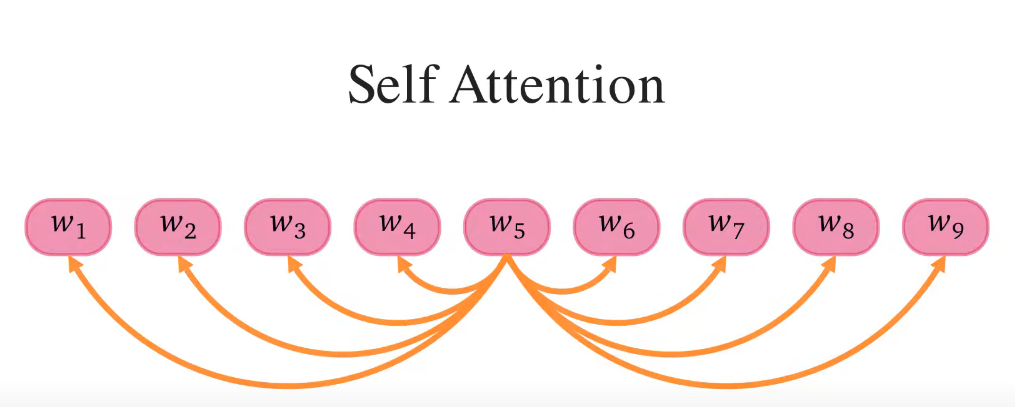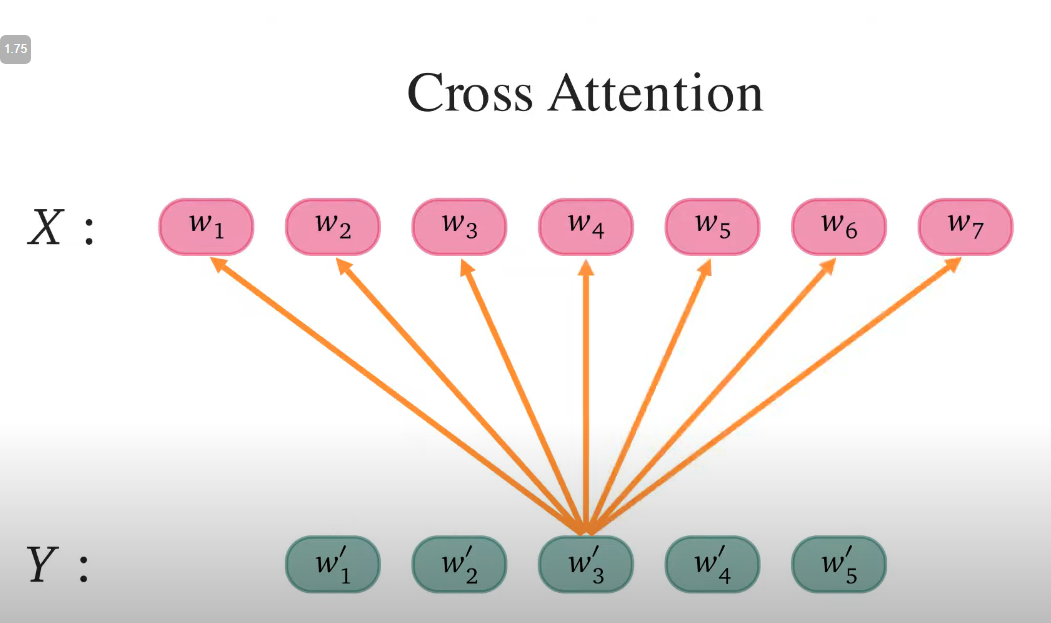

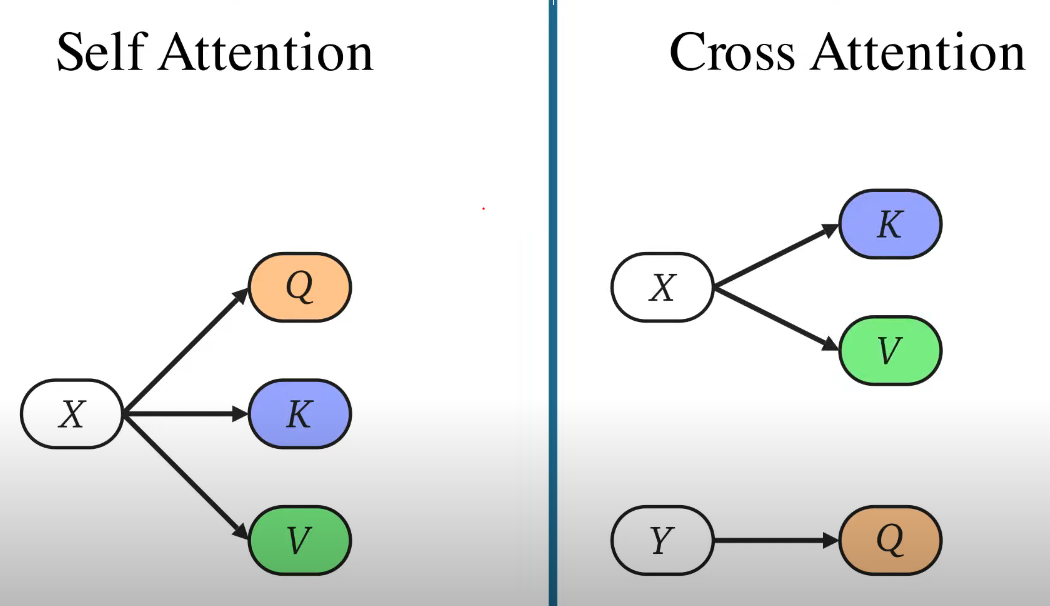

paper in 2021 revised in may 2023 Distract Your Attention: Multi-head Cross Attention Network for Facial Expression Recognition'

Build for facial recognition, it could also be used in our case for hand movement recognition: 

It is based on a novel facial recognition network that they proposed as DAN(Distract your Attention Network) with three key components: Feature Clustering Network (FCN), Multi-head cross Attention Network (MAN), and Attention Fusion Network (AFN)

The paper : https://arxiv.org/pdf/2109.07270.pdf ||||| their github (pytorch): https://github.com/yaoing/DAN

In [ ]:
# doesn't fit for our case but may some insights be inspiring to exploit https://github.com/yaoing/DAN/blob/main/networks/dan.py

class CrossAttentionHead(nn.Module):
    def __init__(self):
        super().__init__()
        self.sa = SpatialAttention()
        self.ca = ChannelAttention()
        self.init_weights()


    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.normal_(m.weight, std=0.001)
                if m.bias is not None:
                    init.constant_(m.bias, 0)
    def forward(self, x):
        sa = self.sa(x)
        ca = self.ca(sa)

        return ca